In [167]:
import pandas as pd
import numpy as np

def create_time_features(df, order_time_col='order_create_time', session_end_col='session_end_time'):
    """
    –°–æ–∑–¥–∞–µ—Ç –Ω–æ–≤—ã–µ –≤—Ä–µ–º–µ–Ω–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ –Ω–∞ –æ—Å–Ω–æ–≤–µ –∫–æ–ª–æ–Ω–æ–∫ —Å –≤—Ä–µ–º–µ–Ω–Ω—ã–º–∏ –º–µ—Ç–∫–∞–º–∏.
    
    –ü–∞—Ä–∞–º–µ—Ç—Ä—ã:
    df - DataFrame —Å –¥–∞–Ω–Ω—ã–º–∏
    order_time_col - –Ω–∞–∑–≤–∞–Ω–∏–µ –∫–æ–ª–æ–Ω–∫–∏ —Å –≤—Ä–µ–º–µ–Ω–µ–º —Å–æ–∑–¥–∞–Ω–∏—è –∑–∞–∫–∞–∑–∞ (timestamp)
    session_end_col - –Ω–∞–∑–≤–∞–Ω–∏–µ –∫–æ–ª–æ–Ω–∫–∏ —Å –≤—Ä–µ–º–µ–Ω–µ–º –æ–∫–æ–Ω—á–∞–Ω–∏—è —Å–µ—Å—Å–∏–∏ (timestamp)
    
    –í–æ–∑–≤—Ä–∞—â–∞–µ—Ç:
    DataFrame —Å –¥–æ–±–∞–≤–ª–µ–Ω–Ω—ã–º–∏ –Ω–æ–≤—ã–º–∏ –ø—Ä–∏–∑–Ω–∞–∫–∞–º–∏
    """
    # –°–æ–∑–¥–∞–µ–º –∫–æ–ø–∏—é DataFrame —á—Ç–æ–±—ã –∏–∑–±–µ–∂–∞—Ç—å –ø—Ä–µ–¥—É–ø—Ä–µ–∂–¥–µ–Ω–∏–π
    df = df.copy()
    
    # –ü—Ä–µ–æ–±—Ä–∞–∑—É–µ–º –∫–æ–ª–æ–Ω–∫–∏ –≤ datetime, –µ—Å–ª–∏ –æ–Ω–∏ –µ—â–µ –Ω–µ –≤ —ç—Ç–æ–º —Ñ–æ—Ä–º–∞—Ç–µ
    df[order_time_col] = pd.to_datetime(df[order_time_col])
    df[session_end_col] = pd.to_datetime(df[session_end_col])
    
    # 1. –†–∞–∑–Ω–∏—Ü–∞ –º–µ–∂–¥—É –æ–∫–æ–Ω—á–∞–Ω–∏–µ–º —Å–µ—Å—Å–∏–∏ –∏ —Å–æ–∑–¥–∞–Ω–∏–µ–º –∑–∞–∫–∞–∑–∞ (–≤ —Å–µ–∫—É–Ω–¥–∞—Ö)
    df['time_to_order_seconds'] = (df[session_end_col] - df[order_time_col]).dt.total_seconds()
    
    # 2. –ü—Ä–∏–∑–Ω–∞–∫–∏ –≤—Ä–µ–º–µ–Ω–∏ —Å–æ–∑–¥–∞–Ω–∏—è –∑–∞–∫–∞–∑–∞
    df['order_hour'] = df[order_time_col].dt.hour
    df['order_day_of_week'] = df[order_time_col].dt.dayofweek  # 0-–ø–æ–Ω–µ–¥–µ–ª—å–Ω–∏–∫, 6-–≤–æ—Å–∫—Ä–µ—Å–µ–Ω—å–µ
    df['order_day_of_month'] = df[order_time_col].dt.day
    df['order_month'] = df[order_time_col].dt.month
    df['order_week_of_year'] = df[order_time_col].dt.isocalendar().week
    df['order_is_weekend'] = df[order_time_col].dt.dayofweek >= 5
    
    # 3. –ü—Ä–∏–∑–Ω–∞–∫–∏ –≤—Ä–µ–º–µ–Ω–∏ –æ–∫–æ–Ω—á–∞–Ω–∏—è —Å–µ—Å—Å–∏–∏
    df['session_end_hour'] = df[session_end_col].dt.hour
    df['session_end_day_of_week'] = df[session_end_col].dt.dayofweek
    df['session_end_day_of_month'] = df[session_end_col].dt.day
    df['session_end_month'] = df[session_end_col].dt.month
    df['session_end_week_of_year'] = df[session_end_col].dt.isocalendar().week
    df['session_end_is_weekend'] = df[session_end_col].dt.dayofweek >= 5
    
    # 4. –†–∞–∑–Ω–∏—Ü–∞ –≤–æ –≤—Ä–µ–º–µ–Ω–∏ –≤ —Ä–∞–∑–Ω—ã—Ö –µ–¥–∏–Ω–∏—Ü–∞—Ö
    df['time_to_order_minutes'] = df['time_to_order_seconds'] / 60
    df['time_to_order_hours'] = df['time_to_order_seconds'] / 3600
    
    # 5. –í—Ä–µ–º–µ–Ω–Ω—ã–µ –∫–∞—Ç–µ–≥–æ—Ä–∏–∏ (—É—Ç—Ä–æ/–¥–µ–Ω—å/–≤–µ—á–µ—Ä/–Ω–æ—á—å)
    bins = [-1, 6, 12, 18, 23]
    labels = ['night', 'morning', 'afternoon', 'evening']
    df['order_time_of_day'] = pd.cut(df['order_hour'], bins=bins, labels=labels)
    df['session_end_time_of_day'] = pd.cut(df['session_end_hour'], bins=bins, labels=labels)
    
    # 6. –Ø–≤–ª—è–µ—Ç—Å—è –ª–∏ –∑–∞–∫–∞–∑ —Å–¥–µ–ª–∞–Ω –≤ —Ç–æ—Ç –∂–µ –¥–µ–Ω—å, —á—Ç–æ –∏ —Å–µ—Å—Å–∏—è
    df['same_day_order'] = df[order_time_col].dt.date == df[session_end_col].dt.date
    
    df['gap_negative'] = df['time_to_order_seconds'] < 0
    df['is_midnight_session'] = df['session_end_hour'].isin([0, 1, 2, 3])
    df['order_during_business_hours'] = df['order_hour'].between(9, 18)
    
    df['hour_diff'] = df['session_end_hour'] - df['order_hour']

    df['order_time_fraction'] = df[order_time_col].dt.hour * 3600 + df[order_time_col].dt.minute * 60 + df[order_time_col].dt.second
    df['order_time_fraction'] /= 86400  # –Ω–æ—Ä–º–∏—Ä–æ–≤–∫–∞ –ø–æ —á–∏—Å–ª—É —Å–µ–∫—É–Ω–¥ –≤ —Å—É—Ç–∫–∞—Ö

    
    # 7. –°–µ–∑–æ–Ω–Ω–æ—Å—Ç—å (–≤—Ä–µ–º–µ–Ω–∞ –≥–æ–¥–∞)
    def get_season(month):
        if month in [12, 1, 2]:
            return 'winter'
        elif month in [3, 4, 5]:
            return 'spring'
        elif month in [6, 7, 8]:
            return 'summer'
        else:
            return 'autumn'
    
    df['order_season'] = df['order_month'].apply(get_season)
    df['session_end_season'] = df['session_end_month'].apply(get_season)
    
    return df

In [168]:
tst_old = pd.read_parquet('data_old/test.parquet')
tst_old

order_id          create_time   good_id  price  sessionkey_id
0       1350922  1976-02-05 15:08:37   9896348   1143      132744630
1       1354989  1976-02-07 15:26:00  69445048   1707      133161905
2       1352637  1976-02-06 11:43:58  70607886    576      132792626
3       1350050  1976-02-05 11:26:19  61918401    436      132683062
4       1341733  1976-02-01 19:36:32  37964900    573      131789790
...         ...                  ...       ...    ...            ...
17191   1358397  1976-02-09 16:13:20  74484779    236      131980166
17192   1357968  1976-02-09 14:30:59  75277186    108      133527708
17193   1358835  1976-02-09 18:39:45  75382827    602      133585500
17194   1365692  1976-02-12 17:50:18  76012025    818      133876415
17195   1365429  1976-02-12 16:14:06  76010719    780      133876415

[17196 rows x 5 columns]

In [169]:
tr = pd.read_parquet('data/train.parquet')
tst = pd.read_parquet('data/test.parquet')

display(tr)

target = tr.target
tr = tr.drop(columns='target')

order_id = tst.order_id
tst = tst.drop(columns='order_id')


tr = create_time_features(tr)
tr = tr.drop(columns=['order_create_time', 'session_end_time'])

tst = create_time_features(tst)
tst = tst.drop(columns=['order_create_time', 'session_end_time'])

target   order_create_time        session_end_time   model_1  \
0            1 1975-12-26 09:30:08 1975-12-26 09:21:03.393  0.798127   
1            0 1975-12-26 10:28:57 1975-12-26 11:01:03.407 -0.573826   
2            1 1975-12-25 11:24:28 1975-12-25 11:23:12.517 -0.665887   
3            1 1975-12-26 14:16:06 1975-12-26 14:29:57.153 -0.284625   
4            0 1975-12-26 18:21:47 1975-12-26 18:17:54.257 -1.710108   
...        ...                 ...                     ...       ...   
104590       1 1975-12-16 12:11:32 1975-12-16 12:56:06.990 -0.784541   
104591       1 1975-11-08 11:29:50 1975-11-07 23:55:00.773 -0.504846   
104592       0 1975-11-12 09:14:35 1975-11-12 09:15:26.047 -1.710108   
104593       1 1975-11-10 17:28:07 1975-11-10 17:23:02.973 -0.403279   
104594       0 1975-11-20 10:35:19 1975-11-19 14:49:35.277 -0.573826   

         model_2   model_3  model_4   model_5  
0       0.644805  0.039843        1  0.430339  
1       0.220081  0.020889        0  0.177593  
2       0.644805  0.039810        0  0.431897  
3       0.644805  0.040026        0  0.432045  
4      -0.221541  0.020585        0  0.174115  
...          ...       ...      ...       ...  
104590  0.220081  0.020901        0  0.188639  
104591  0.220081  0.029831        0  0.175063  
104592 -0.221541  0.021167        0  0.191408  
104593  0.644805  0.040814        0  0.452594  
104594  0.220081  0.036924        0  0.147717  

[104595 rows x 8 columns]

In [170]:
# –î–æ–ø—É—Å—Ç–∏–º, optimal_tau –Ω–∞–π–¥–µ–Ω –∫–∞–∫ –≤—ã—à–µ
tau = 0

# –±–∏–Ω–∞—Ä–∫–∞: 1 ‚Äî –µ—Å–ª–∏ Œî <= œÑ (—Ç.–µ. ¬´—Å–∫–æ—Ä–µ–µ –∫–æ–ª–ª-—Ü–µ–Ω—Ç—Ä¬ª), –∏–Ω–∞—á–µ 0
tr['callcenter_rule'] = (tr['time_to_order_seconds'] <= tau).astype(int)
tst['callcenter_rule'] = (tst['time_to_order_seconds'] <= tau).astype(int)


threshold_hard = -28*60
tr['callcenter_hard'] = (tr['time_to_order_seconds'] < threshold_hard).astype(int)
tst['callcenter_hard'] = (tst['time_to_order_seconds'] < threshold_hard).astype(int)

[LightGBM] [Info] Number of positive: 29679, number of negative: 53997
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005027 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1883
[LightGBM] [Info] Number of data points in the train set: 83676, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.354690 -> initscore=-0.598489
[LightGBM] [Info] Start training from score -0.598489
Training until validation scores don't improve for 50 rounds
[50]	train's auc: 0.957484	valid's auc: 0.955227
[100]	train's auc: 0.959313	valid's auc: 0.95612
[150]	train's auc: 0.961078	valid's auc: 0.956968
[200]	train's auc: 0.962698	valid's auc: 0.957365
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[250]	train's auc: 0.964117	valid's auc: 0.957548
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[300]	train's auc: 0.965582	valid's auc: 0.9575

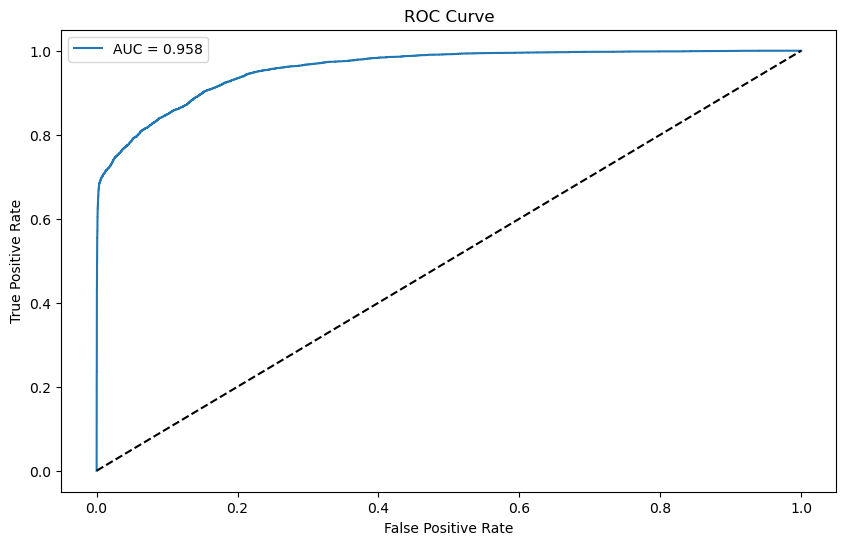

In [171]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm as lgb

# –û–±—Ä–∞–±–æ—Ç–∫–∞ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
cat_features = tr.select_dtypes(include=['category', 'object', 'bool']).columns.tolist()
numeric_features = tr.select_dtypes(include=np.number).columns.tolist()

for col in cat_features:
    if col in tr.columns:
        tr[col] = tr[col].astype('category')

X = tr
y = target

# –°—Ç—Ä–∞—Ç–∏—Ñ–∏—Ü–∏—Ä–æ–≤–∞–Ω–Ω–æ–µ —Ä–∞–∑–¥–µ–ª–µ–Ω–∏–µ
X_train, X_val, y_train, y_val = train_test_split(
    X, y, 
    test_size=0.2, 
    stratify=y,
    random_state=42
)

# –°–æ–∑–¥–∞–Ω–∏–µ Dataset –¥–ª—è LightGBM
train_data = lgb.Dataset(X_train, label=y_train, categorical_feature=cat_features)
val_data = lgb.Dataset(X_val, label=y_val, categorical_feature=cat_features, reference=train_data)

# –ü–∞—Ä–∞–º–µ—Ç—Ä—ã –º–æ–¥–µ–ª–∏
params = {
    'objective': 'binary',
    'metric': 'auc',
    'boosting_type': 'gbdt',
    'learning_rate': 0.2,
    'learning_rate': 0.032100074071180665,
	'num_leaves': 38,
	'max_depth': 8,
	'feature_fraction': 0.65268762313293,
	'bagging_fraction': 0.843860662378207,
	'bagging_freq': 2,
	'min_data_in_leaf': 73,
	'verbose': 1,
    'seed': 42,
}

# –û–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏
model = lgb.train(
    params,
    train_data,
    num_boost_round=300,
    valid_sets=[train_data, val_data],
    valid_names=['train', 'valid'],
    callbacks=[
		lgb.early_stopping(stopping_rounds=50, verbose=True),
		lgb.log_evaluation(period=50)
	],
)

# –ü—Ä–æ–≥–Ω–æ–∑ –∏ –æ—Ü–µ–Ω–∫–∞
val_probs = model.predict(X_val, num_iteration=model.best_iteration)
roc_auc = roc_auc_score(y_val, val_probs)
print(f"\nROC-AUC: {roc_auc:.4f}")

# –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è ROC-–∫—Ä–∏–≤–æ–π
fpr, tpr, _ = roc_curve(y_val, val_probs)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.3f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [172]:
# –ü—Ä–∏–≤–µ–¥–µ–Ω–∏–µ —Ç–∏–ø–æ–≤ –≤ tst –∫ —Ç–µ–º –∂–µ –∫–∞—Ç–µ–≥–æ—Ä–∏—è–º, —á—Ç–æ –∏ –≤ tr
for col in cat_features:
    if col in tst.columns:
        # –°–¥–µ–ª–∞—Ç—å –∫–æ–ª–æ–Ω–∫—É –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω–æ–π
        tst[col] = tst[col].astype('category')
        # –£—Å—Ç–∞–Ω–æ–≤–∏—Ç—å —Ç–µ –∂–µ –∫–∞—Ç–µ–≥–æ—Ä–∏–∏, —á—Ç–æ –∏ –≤ –æ–±—É—á–µ–Ω–∏–∏
        tst[col] = tst[col].cat.set_categories(tr[col].cat.categories)


tst['pred'] = model.predict(tst, num_iteration=model.best_iteration)
tst['order_id'] = order_id

tst[['order_id', 'pred']].to_csv('bbbbbbbbbbbbb.csv', index=False)

In [173]:
—ã

NameError: name '—ã' is not defined

c:\Users\Admin\anaconda3\Lib\site-packages\shap\explainers\_tree.py:544: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn(


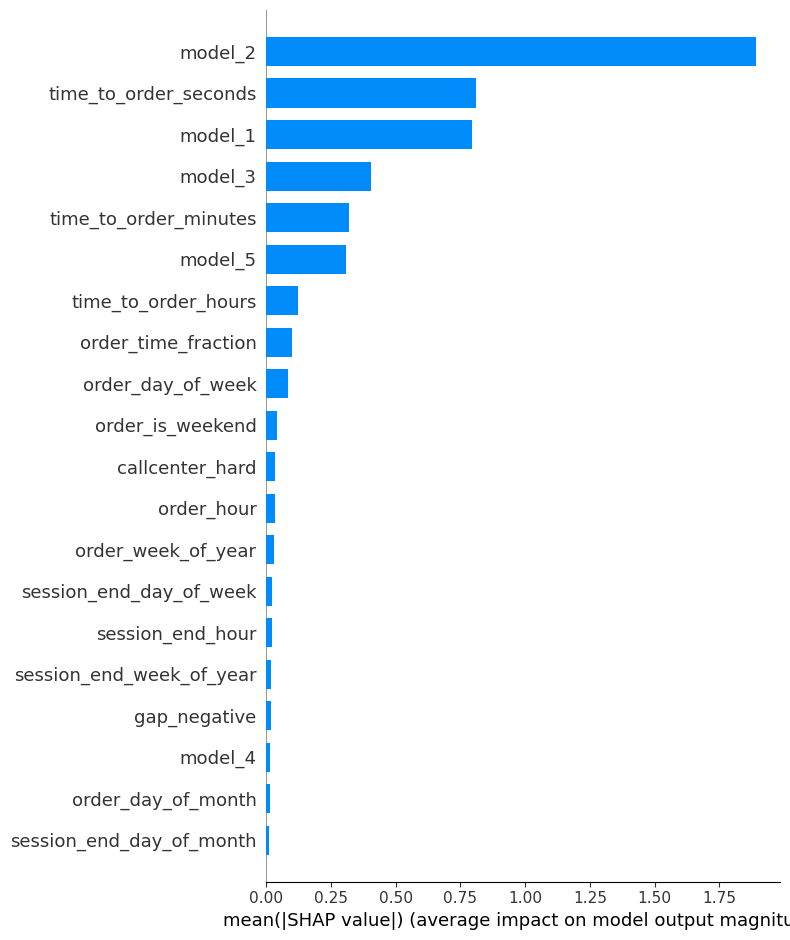

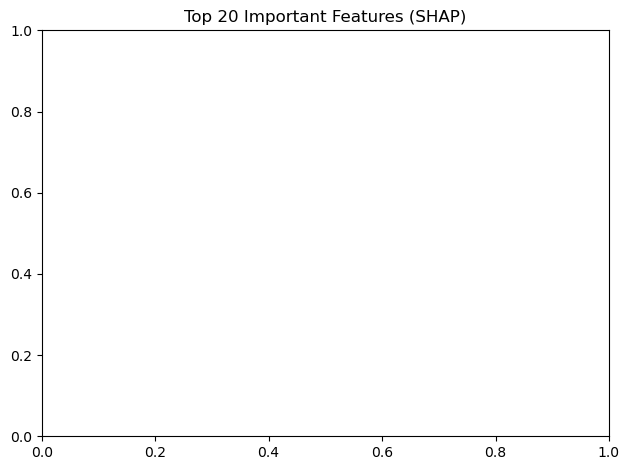

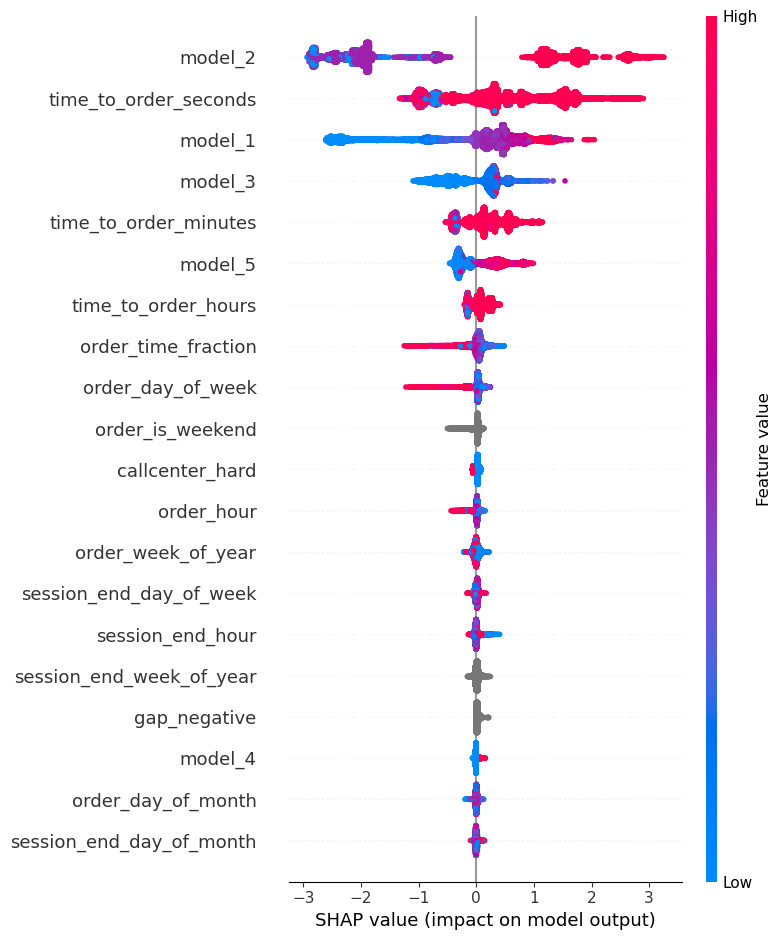

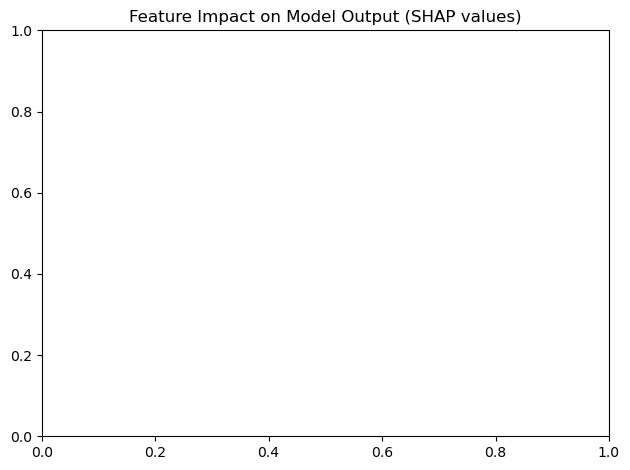

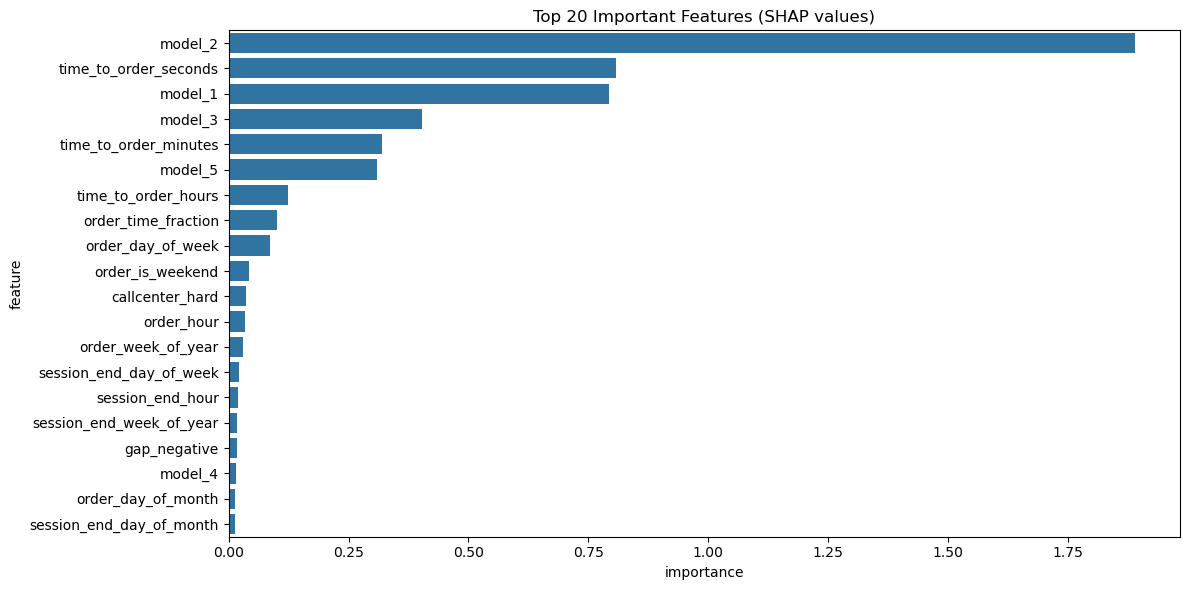

In [174]:
import shap

# –ò–Ω–∏—Ü–∏–∞–ª–∏–∑–∞—Ü–∏—è SHAP
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_val)

# –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è summary plot (–∞–Ω–∞–ª–æ–≥ –≤–∞–∂–Ω–æ—Å—Ç–∏ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤)
plt.figure(figsize=(12, 6))
shap.summary_plot(shap_values, X_val, plot_type="bar", max_display=20)
plt.title('Top 20 Important Features (SHAP)')
plt.tight_layout()
plt.show()

# –î–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω–æ: –±–æ–ª–µ–µ –¥–µ—Ç–∞–ª—å–Ω–∞—è –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è SHAP –∑–Ω–∞—á–µ–Ω–∏–π
plt.figure(figsize=(12, 6))
shap.summary_plot(shap_values, X_val, plot_type="dot", max_display=20)
plt.title('Feature Impact on Model Output (SHAP values)')
plt.tight_layout()
plt.show()

# –ê–ª—å—Ç–µ—Ä–Ω–∞—Ç–∏–≤–Ω—ã–π –≤–∞—Ä–∏–∞–Ω—Ç - DataFrame —Å –≤–∞–∂–Ω–æ—Å—Ç—å—é –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –ø–æ SHAP
shap_importance = pd.DataFrame({
    'feature': X_val.columns,
    'importance': np.abs(shap_values).mean(axis=0)
}).sort_values('importance', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='importance', y='feature', data=shap_importance.head(20))
plt.title('Top 20 Important Features (SHAP values)')
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd

# —á–∏—Ç–∞–µ–º –¥–∞–Ω–Ω—ã–µ
tr = pd.read_parquet('data/train.parquet')
tr['order_create_time'] = pd.to_datetime(tr['order_create_time'])
tr['session_end_time'] = pd.to_datetime(tr['session_end_time'])

# —Å—á–∏—Ç–∞–µ–º –¥–µ–ª—å—Ç—É (—Å–µ–∫—É–Ω–¥—ã)
tr['time_to_order_seconds'] = (tr['session_end_time'] - tr['order_create_time']).dt.total_seconds()

# –ø—Ä–∞–≤–∏–ª–æ A: –≤–Ω—É—Ç—Ä–∏ —Å–µ—Å—Å–∏–∏ -> –æ–Ω–ª–∞–π–Ω (target=0)
mask_A = tr['time_to_order_seconds'] < 0
n_A = mask_A.sum()
correct_A = ((tr.loc[mask_A, 'target'] == 0).sum())
print(f"–ì–∏–ø–æ—Ç–µ–∑–∞ A: –≤–Ω—É—Ç—Ä–∏ —Å–µ—Å—Å–∏–∏ (Œî<0) –≤—Å–µ–≥–æ {n_A} –∑–∞–ø–∏—Å–µ–π, –∏–∑ –Ω–∏—Ö –æ–Ω–ª–∞–π–Ω={correct_A} ({correct_A/n_A:.4%})")

# –ø—Ä–∞–≤–∏–ª–æ B: –ø–æ—Å–ª–µ —Å–µ—Å—Å–∏–∏ -> –∫–æ–ª–ª-—Ü–µ–Ω—Ç—Ä (target=1)
mask_B = tr['time_to_order_seconds'] > 0
n_B = mask_B.sum()
correct_B = ((tr.loc[mask_B, 'target'] == 1).sum())
print(f"–ì–∏–ø–æ—Ç–µ–∑–∞ B: –ø–æ—Å–ª–µ —Å–µ—Å—Å–∏–∏ (Œî>0) –≤—Å–µ–≥–æ {n_B} –∑–∞–ø–∏—Å–µ–π, –∏–∑ –Ω–∏—Ö –∫–æ–ª–ª-—Ü–µ–Ω—Ç—Ä={correct_B} ({correct_B/n_B:.4%})")

# –Ω–∞—Ä—É—à–µ–Ω–∏—è
false_A = n_A - correct_A
false_B = n_B - correct_B
print(f"\n–ù–∞—Ä—É—à–µ–Ω–∏—è –ø—Ä–∞–≤–∏–ª–∞ A (expected 0): {false_A}")
print(f"–ù–∞—Ä—É—à–µ–Ω–∏—è –ø—Ä–∞–≤–∏–ª–∞ B (expected 1): {false_B}")
print(f"–í—Å–µ–≥–æ –Ω–µ–∫–ª–∞—Å—Å–∏—Ñ–∏—Ü–∏—Ä—É–µ–º—ã—Ö (Œî==0): {(tr['time_to_order_seconds']==0).sum()}")


–ì–∏–ø–æ—Ç–µ–∑–∞ A: –≤–Ω—É—Ç—Ä–∏ —Å–µ—Å—Å–∏–∏ (Œî<0) –≤—Å–µ–≥–æ 61399 –∑–∞–ø–∏—Å–µ–π, –∏–∑ –Ω–∏—Ö –æ–Ω–ª–∞–π–Ω=32488 (52.9129%)
–ì–∏–ø–æ—Ç–µ–∑–∞ B: –ø–æ—Å–ª–µ —Å–µ—Å—Å–∏–∏ (Œî>0) –≤—Å–µ–≥–æ 42572 –∑–∞–ø–∏—Å–µ–π, –∏–∑ –Ω–∏—Ö –∫–æ–ª–ª-—Ü–µ–Ω—Ç—Ä=7818 (18.3642%)

–ù–∞—Ä—É—à–µ–Ω–∏—è –ø—Ä–∞–≤–∏–ª–∞ A (expected 0): 28911
–ù–∞—Ä—É—à–µ–Ω–∏—è –ø—Ä–∞–≤–∏–ª–∞ B (expected 1): 34754
–í—Å–µ–≥–æ –Ω–µ–∫–ª–∞—Å—Å–∏—Ñ–∏—Ü–∏—Ä—É–µ–º—ã—Ö (Œî==0): 0


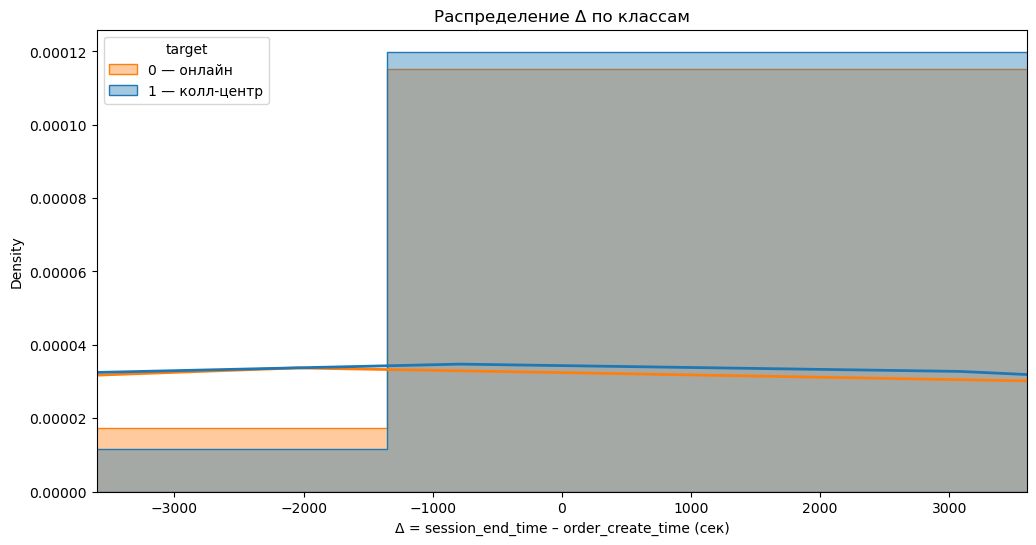

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# –ü—Ä–µ–¥–ø–æ–ª–∞–≥–∞–µ–º, —á—Ç–æ tr —É–∂–µ –∑–∞–≥—Ä—É–∂–µ–Ω –∏ —Å–æ–¥–µ—Ä–∂–∏—Ç –∫–æ–ª–æ–Ω–∫–∏ ['time_to_order_seconds', 'target']
plt.figure(figsize=(12, 6))
sns.histplot(data=tr, x='time_to_order_seconds', hue='target', 
             bins=200, element='step', stat='density', common_norm=False, alpha=0.4)
sns.kdeplot(data=tr, x='time_to_order_seconds', hue='target', 
            lw=2, common_norm=False)
plt.xlim(-3600, 3600)         # –Ω–∞–ø—Ä–∏–º–µ—Ä, –æ–≥—Ä–∞–Ω–∏—á–∏–º—Å—è ¬±1 —á–∞—Å–æ–º
plt.xlabel('Œî = session_end_time ‚Äì order_create_time (—Å–µ–∫)')
plt.title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ Œî –ø–æ –∫–ª–∞—Å—Å–∞–º')
plt.legend(title='target', labels=['0 ‚Äî –æ–Ω–ª–∞–π–Ω', '1 ‚Äî –∫–æ–ª–ª-—Ü–µ–Ω—Ç—Ä'])
plt.show()


In [ ]:
import optuna
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

def objective(trial):
    params = {
        'objective': 'binary',
        'metric': 'auc',
        'boosting_type': 'gbdt',
        'verbose': -1,
        'seed': 42,
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'num_leaves': trial.suggest_int('num_leaves', 16, 64),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'feature_fraction': trial.suggest_float('feature_fraction', 0.6, 1.0),
        'bagging_fraction': trial.suggest_float('bagging_fraction', 0.6, 1.0),
        'bagging_freq': trial.suggest_int('bagging_freq', 1, 10),
        'min_data_in_leaf': trial.suggest_int('min_data_in_leaf', 10, 100),
    }

    train_data = lgb.Dataset(X_train, label=y_train, categorical_feature=cat_features)
    val_data = lgb.Dataset(X_val, label=y_val, categorical_feature=cat_features)

    model = lgb.train(
        params,
        train_data,
        num_boost_round=300,
        valid_sets=[train_data, val_data],
        valid_names=['train', 'valid'],
        callbacks=[
            lgb.early_stopping(stopping_rounds=30, verbose=False),
        ],
    )

    val_preds = model.predict(X_val, num_iteration=model.best_iteration)
    score = roc_auc_score(y_val, val_preds)
    return score

# ‚öôÔ∏è –ó–∞–ø—É—Å–∫ Optuna
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=30)

print("\n‚úÖ Best ROC-AUC: {:.4f}".format(study.best_value))
print("üìå Best params:")
for k, v in study.best_params.items():
    print(f"{k}: {v}")


[I 2025-05-19 00:08:52,321] A new study created in memory with name: no-name-98020fa0-42fe-4b26-9843-ef462ebe9024
[I 2025-05-19 00:08:52,652] Trial 0 finished with value: 0.9562981854101602 and parameters: {'learning_rate': 0.24268038105909745, 'num_leaves': 60, 'max_depth': 7, 'feature_fraction': 0.7121723856928086, 'bagging_fraction': 0.9000235014881184, 'bagging_freq': 4, 'min_data_in_leaf': 38}. Best is trial 0 with value: 0.9562981854101602.
[I 2025-05-19 00:08:53,239] Trial 1 finished with value: 0.9564138124237614 and parameters: {'learning_rate': 0.11568158354474757, 'num_leaves': 37, 'max_depth': 3, 'feature_fraction': 0.8074143288670884, 'bagging_fraction': 0.6126710132135985, 'bagging_freq': 4, 'min_data_in_leaf': 71}. Best is trial 1 with value: 0.9564138124237614.
[I 2025-05-19 00:08:53,679] Trial 2 finished with value: 0.9563913239854644 and parameters: {'learning_rate': 0.26249754891787, 'num_leaves': 30, 'max_depth': 3, 'feature_fraction': 0.7821821726353418, 'bagging_f

KeyboardInterrupt: 